# ASSIGNMENT 4

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Loading dataset from seaborn
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [21]:
#Filling age with median
df['age'].fillna(df['age'].median(), inplace=True)

#Droping 'deck' column only if it exists
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

#Droping rows with missing values in 'embark_town' or 'embarked'
df.dropna(subset=['embark_town', 'embarked'], inplace=True)


/tmp/ipython-input-21-4075429784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


###Data Visualization

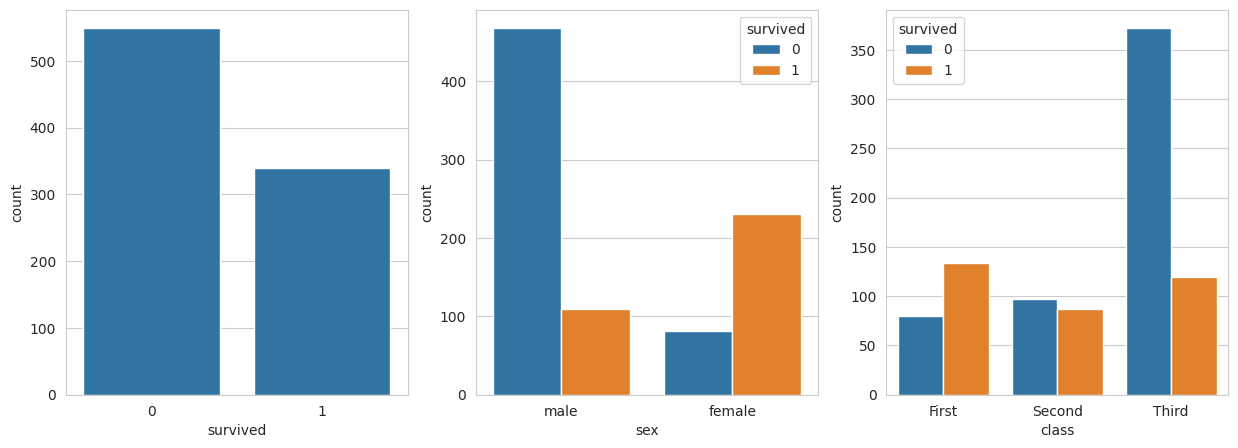

In [23]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='survived', data=df, ax=axes[0])
sns.countplot(x='sex', hue='survived', data=df, ax=axes[1])
sns.countplot(x='class', hue='survived', data=df, ax=axes[2])
plt.show()

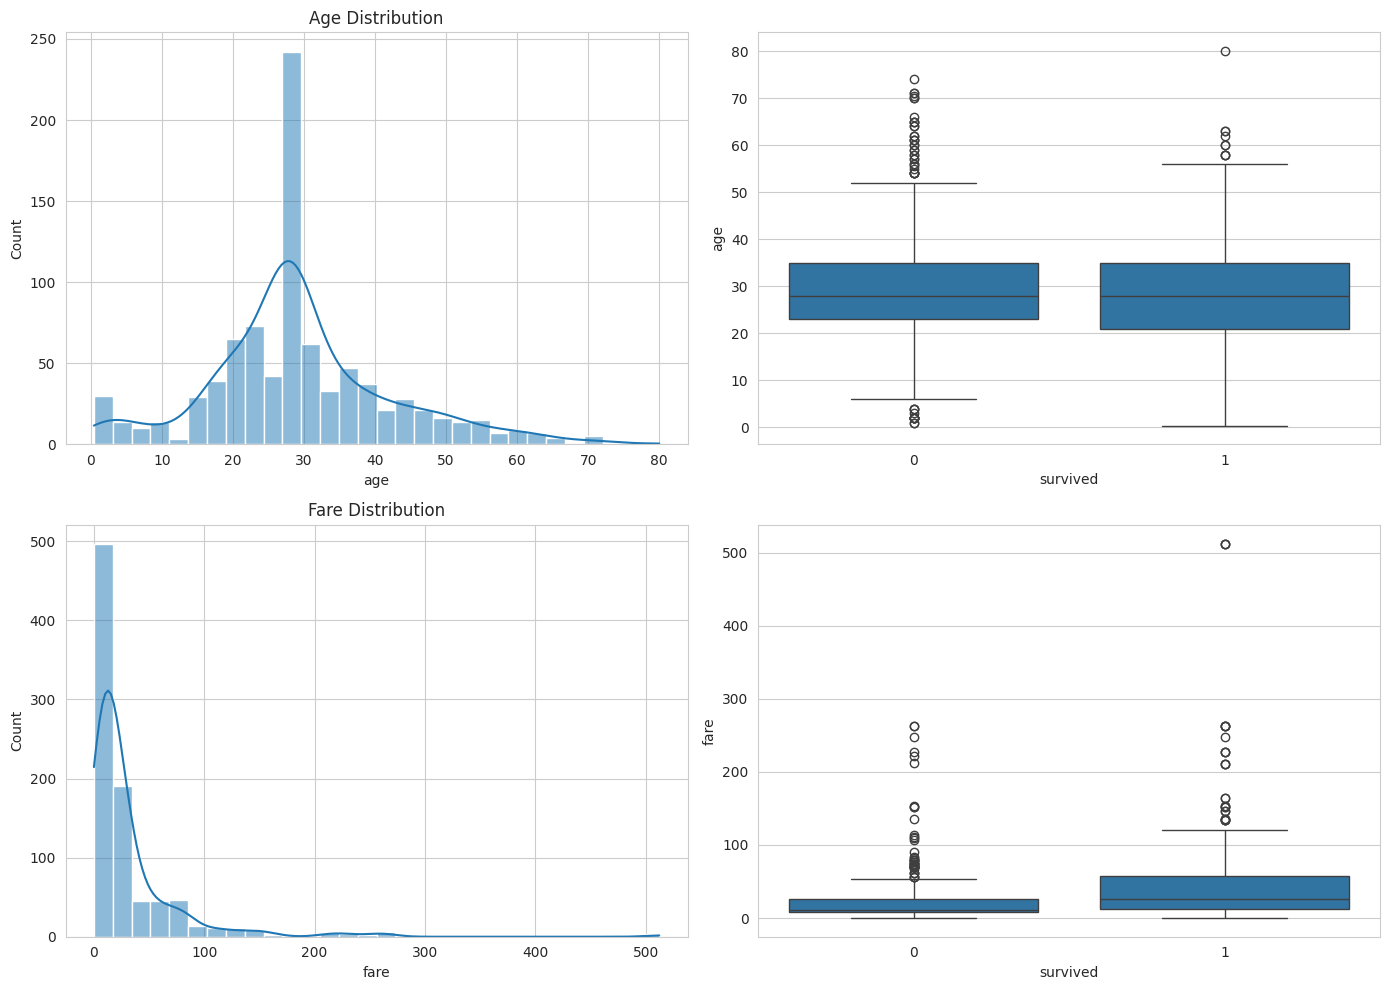

In [24]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
sns.histplot(df['age'], bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title('Age Distribution')
sns.boxplot(x='survived', y='age', data=df, ax=axes[0,1])
sns.histplot(df['fare'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Fare Distribution')
sns.boxplot(x='survived', y='fare', data=df, ax=axes[1,1])
plt.tight_layout()
plt.show()

In [25]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare'] < Q1 - 1.5 * IQR) | (df['fare'] > Q3 + 1.5 * IQR)]
print(f"Outliers in Fare: {outliers.shape[0]}")

Outliers in Fare: 114


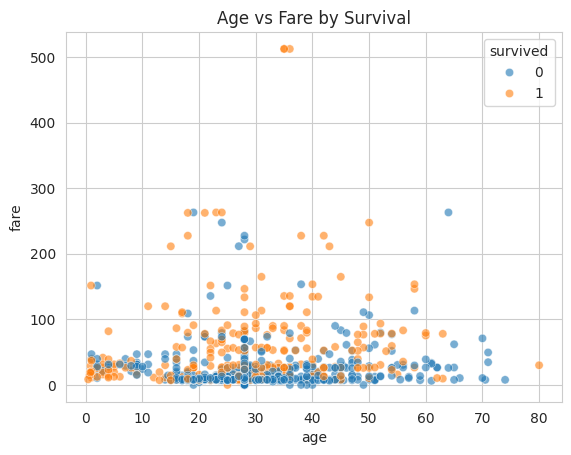

In [26]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df, alpha=0.6)
plt.title('Age vs Fare by Survival')
plt.show()

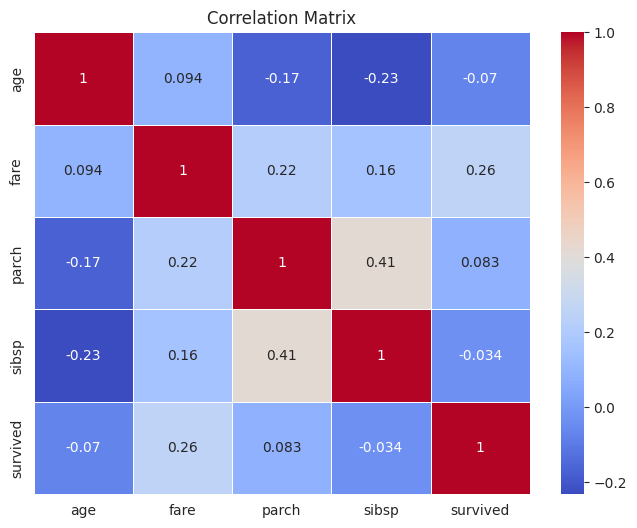

In [27]:
corr = df[['age','fare','parch','sibsp','survived']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

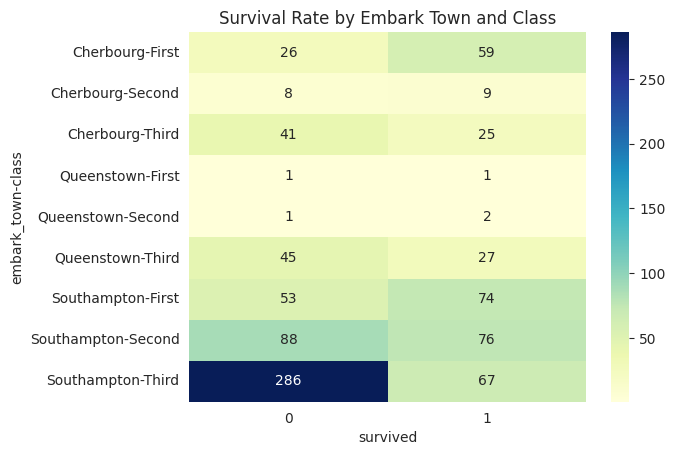

In [28]:
ct = pd.crosstab([df.embark_town, df['class']], df.survived)
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Rate by Embark Town and Class')
plt.show()

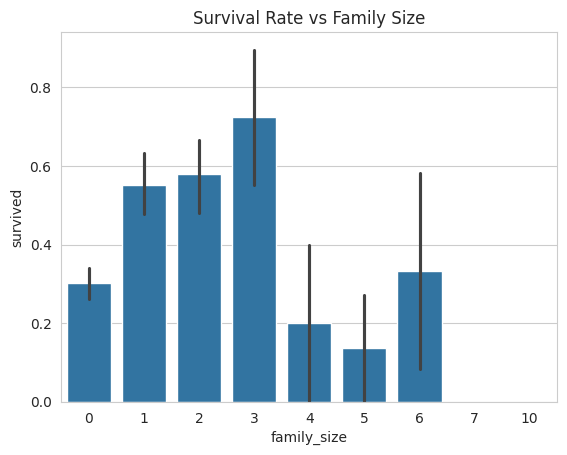

In [29]:
df['family_size'] = df['sibsp'] + df['parch']
sns.barplot(x='family_size', y='survived', data=df)
plt.title('Survival Rate vs Family Size')
plt.show()

### Data Summary:
- **Females** and **1st-class passengers** had higher survival rates.
- **Fare** was positively associated with survival, though had outliers.
- **Family size** impacted survival: solo travelers or large families fared worse.
- **Embark town** and **class** showed survival variation.